In [3]:
import pickle
import logging
from easydict import EasyDict
from pathlib import Path
import os
import warnings
import datetime

from tools import *
logging.basicConfig(level=logging.INFO)
warnings.filterwarnings("ignore")


In [ ]:

def strategize(start=datetime.datetime.now()-datetime.timedelta(days=10*365), end=datetime.datetime.today()):

    stocks = ['SPY', 'FB']
    indicator_list = ['RSI', 'MACD', 'BBAND']

    dir_utils.create_dir(stocks)
    for name in stocks:

        best_strategy = EasyDict({'Indicator':'None', 'Returns':-1, 'Trade Count':-1})
        for indicator in indicator_list:
            logging.info('> Trading: %s' % name)
            logging.info('> Indicator: %s' % indicator)
            cfg, stock, model = model_utils.model_constructor(name, indicator, train_test_split=100, start=datetime.datetime.now()-datetime.timedelta(days=10*365), end=datetime.datetime.today())
            
            print('Testing data: ', stock.Test_data)

            ret, tc, avgDays, buy_signals, sell_signals = model(cfg, stock)
            strategy_returns = EasyDict({'Indicator':indicator, 'Returns':ret, 'Trade Count':tc})
            
            if strategy_returns.Returns > best_strategy.Returns:
                best_strategy = strategy_returns

            start_date = stock.Test_start
            end_date = stock.Test_end
            print('\n')

        print('Buying: ', buy_signals)
        print('Selling: ', sell_signals)
        
        logging.info('> Strategy:\n%s' % best_strategy)
        logging.info('> **** from %s to %s ****\n\n', start_date, end_date)
        

        strategy_filepath = str(Path(os.path.dirname(__file__))) + '\\stock_data\\' + stock.Name + r'\strategy\best_strategy.pickle'
        try:
            with open(strategy_filepath, 'rb') as f:
                last_performance = pickle.load(f)

            if best_strategy.Returns > last_performance.Returns:
                with open(strategy_filepath, 'wb') as f:
                    pickle.dump(best_strategy, f)
                logging.info('> Strategy Updated')
        except FileNotFoundError or EOFError:
            with open(strategy_filepath, 'wb') as f:
                pickle.dump(best_strategy, f)
            logging.info('> Strategy Created')

    #dir_utils.clear_cache()

In [ ]:
dir_utils.clear_cache()

In [1]:
import yfinance as yf
import numpy as np
import math
df = yf.download('AAPL', start='2010-01-01')
df = df['Adj Close']
a = df[:10]
b = df[20:32]
#np.prod(np.array(a[:np.min(len(a), len(b))])/np.array(b[:np.min(len(a), len(b))]))
a

[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    6.535084
2010-01-05    6.546384
2010-01-06    6.442256
2010-01-07    6.430346
2010-01-08    6.473095
2010-01-11    6.415991
2010-01-12    6.343010
2010-01-13    6.432481
2010-01-14    6.395229
2010-01-15    6.288352
Name: Adj Close, dtype: float64

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import talib as ta

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

dt = yf.download('SPY')
rsi = ta.RSI(dt['Adj Close'])

lowbar = np.ones(200) * 30
highbar = np.ones(200) * 70

data = rsi[1020:1220]
plt.plot(data, label='RSI')
plt.plot(data.index, lowbar, color='red', linestyle='dashed', linewidth = 2.5, label='Lower Threshold')
plt.plot(data.index, highbar, color='green', linestyle='dashed', linewidth = 2.5, label = 'Upper Threshold')
plt.title('Relative Strength Index (SPY)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.show()

plt.savefig('Images/rsi.png')

In [ ]:
import yfinance as yf
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

ticker = 'GOOGL'
stock = yf.download(ticker, start = '2021-04-01')
vol = np.std((stock['High']+stock['Low'])/2) / np.average((stock['High']+stock['Low'])/2)
sd = np.std((stock['High']+stock['Low'])/2)
vol, sd

In [ ]:
import matplotlib.pyplot as plt
import talib as ta

plt.plot(stock['Adj Close'], label='Stock price')
# plt.plot(ta.SMA(stock['Adj Close'],50), label='Moving Average')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title(f'{ticker} stock price (Apr 21 - Mar22)')
plt.legend(loc='upper right')
plt.savefig(f'{ticker} price chart')
plt.show()

[*********************100%***********************]  1 of 1 completed


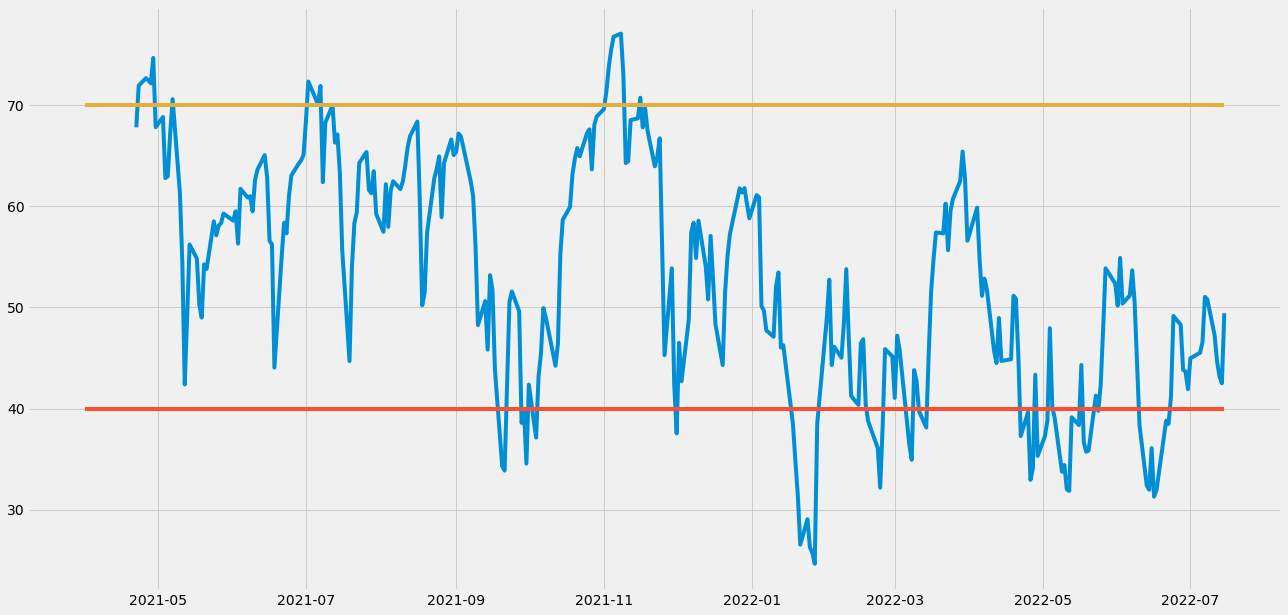

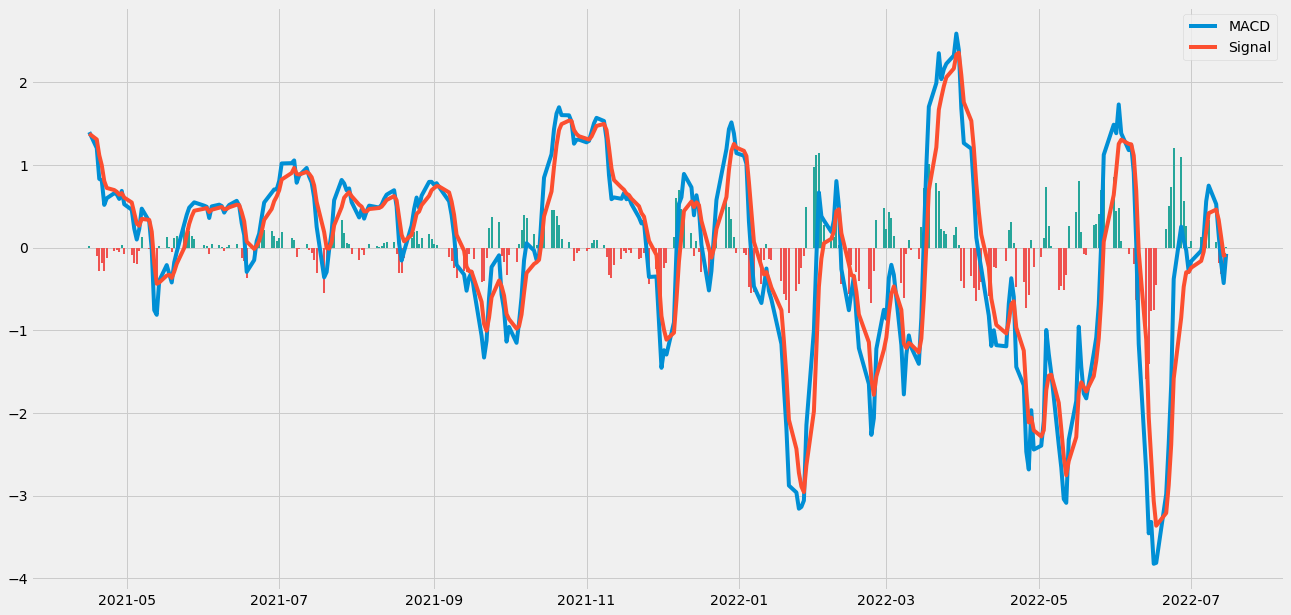

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import talib as ta
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

df = yf.download('SPY', start='2021-04-01')
rsi = ta.RSI(df['Adj Close'])
macd, signal, hist = ta.MACD(df['Adj Close'], 8,6,4)

axs = np.ones((2, len(rsi)))
axs[0] = 40
axs[1] = 70

plt.plot(rsi)
plt.plot(rsi.index, axs[0])
plt.plot(rsi.index, axs[1])
plt.show()

plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal')
for i in range(len(df)):
    if str(hist[i])[0] == '-':
        plt.bar(df.index[i], hist[i], color = '#ef5350')
    else:
        plt.bar(df.index[i], hist[i], color = '#26a69a')
plt.legend(loc='upper right')
plt.show()
